<a href="https://colab.research.google.com/github/surajdusa/Predictive-Modelling-of-Energy-Usage-in-Response-to-Dynamic-Pricing-Signals-in-London-Households/blob/main/Suraj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CC_LCL-FullData.csv')

In [4]:
df.head()

,LCLid,stdorToU,DateTime,KWH/hh (per half hour)
0,MAC000002,Std,2012-10-12 00:30:00.0000000,0
1,MAC000002,Std,2012-10-12 01:00:00.0000000,0
2,MAC000002,Std,2012-10-12 01:30:00.0000000,0
3,MAC000002,Std,2012-10-12 02:00:00.0000000,0
4,MAC000002,Std,2012-10-12 02:30:00.0000000,0


In [5]:
print('The number of data points in the dataset:', df.shape[0])

The number of data points in the dataset: 167932474


In [6]:
print('The number of data points in the dataset:', df.shape[1])

The number of data points in the dataset: 4


In [7]:
df = df.iloc[:2000000]

In [8]:
print(df.isnull().sum())

LCLid                      0
stdorToU                   0
DateTime                   0
KWH/hh (per half hour)     0
dtype: int64


In [9]:
df["Date"] = pd.to_datetime(df["DateTime"]).dt.date
df["Time"] = pd.to_datetime(df["DateTime"]).dt.time
df.drop(columns=["DateTime"], inplace=True)

In [10]:
print('The number of data points in the dataset:', df.shape[0])

The number of data points in the dataset: 2000000


In [11]:
df.head()

,LCLid,stdorToU,KWH/hh (per half hour),Date,Time
0,MAC000002,Std,0,2012-10-12,00:30:00
1,MAC000002,Std,0,2012-10-12,01:00:00
2,MAC000002,Std,0,2012-10-12,01:30:00
3,MAC000002,Std,0,2012-10-12,02:00:00
4,MAC000002,Std,0,2012-10-12,02:30:00


In [12]:
print(df.columns.tolist())

['LCLid', 'stdorToU', 'KWH/hh (per half hour) ', 'Date', 'Time']


In [13]:
df.columns = df.columns.str.strip()

In [14]:
df["KWH/hh (per half hour)"] = pd.to_numeric(df["KWH/hh (per half hour)"], errors="coerce")

In [15]:
dx = df.groupby("Date")["KWH/hh (per half hour)"].sum().reset_index()
dx.columns = ["Date", "KWH"]

In [16]:
dx.head(20)

,Date,KWH
0,2011-12-06,2.947000
1,2011-12-07,143.174000
2,2011-12-08,365.577000
3,2011-12-09,502.532000
4,2011-12-10,637.385000
5,2011-12-11,670.710001
6,2011-12-12,614.313000
7,2011-12-13,570.259000
8,2011-12-14,627.398000
9,2011-12-15,643.423001


In [17]:
dx['Date'] = pd.to_datetime(dx['Date'], errors='coerce')

In [18]:
dx['year'] = dx['Date'].dt.year
dx['quarter'] = dx['Date'].dt.quarter
dx['month'] = dx['Date'].dt.month
dx['day'] = dx['Date'].dt.day

In [19]:
dx.head()

,Date,KWH,year,quarter,month,day
0,2011-12-06,2.947,2011,4,12,6
1,2011-12-07,143.174,2011,4,12,7
2,2011-12-08,365.577,2011,4,12,8
3,2011-12-09,502.532,2011,4,12,9
4,2011-12-10,637.385,2011,4,12,10


In [20]:
import calendar
dx['month'] = dx['month'].apply(lambda x: calendar.month_name[x])

In [21]:
dx.head()

,Date,KWH,year,quarter,month,day
0,2011-12-06,2.947,2011,4,December,6
1,2011-12-07,143.174,2011,4,December,7
2,2011-12-08,365.577,2011,4,December,8
3,2011-12-09,502.532,2011,4,December,9
4,2011-12-10,637.385,2011,4,December,10


In [22]:
dx.tail()

,Date,KWH,year,quarter,month,day
811,2014-02-24,620.515001,2014,1,February,24
812,2014-02-25,575.761001,2014,1,February,25
813,2014-02-26,602.744000,2014,1,February,26
814,2014-02-27,605.165001,2014,1,February,27
815,2014-02-28,41.394000,2014,1,February,28


In [23]:
dx.KWH.describe()

,KWH
count,816.000000
mean,586.107567
std,125.938950
min,2.947000
25%,482.893750
50%,564.665500
75%,668.310750
max,942.200000


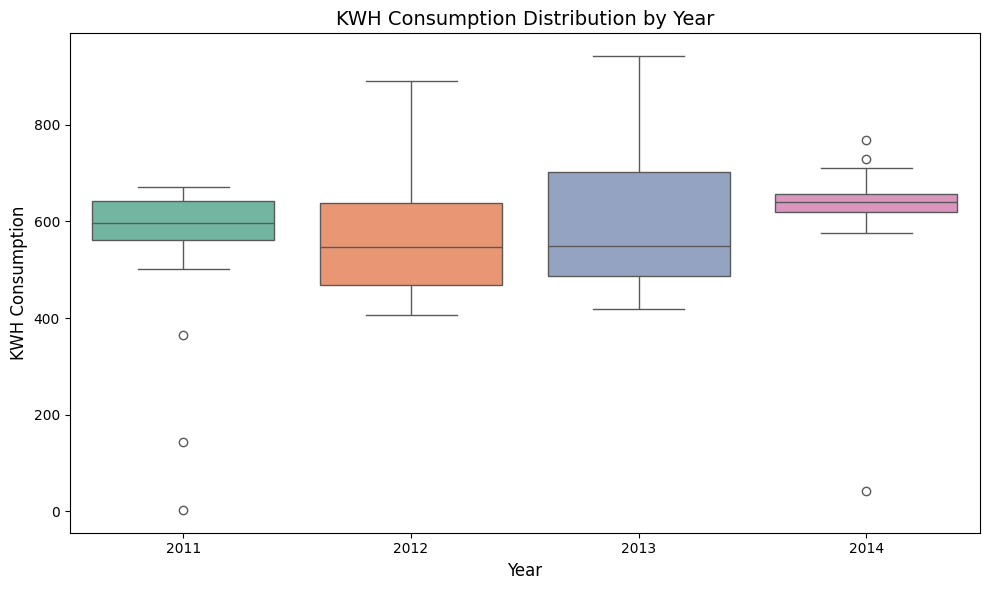

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='KWH', data=dx, palette='Set2')
plt.title("KWH Consumption Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KWH Consumption", fontsize=12)
plt.tight_layout()
plt.show()

In [25]:
Q1 = dx['KWH'].quantile(0.25)
Q3 = dx['KWH'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
dx = dx[(dx['KWH'] >= lower_bound) & (dx['KWH'] <= upper_bound)]

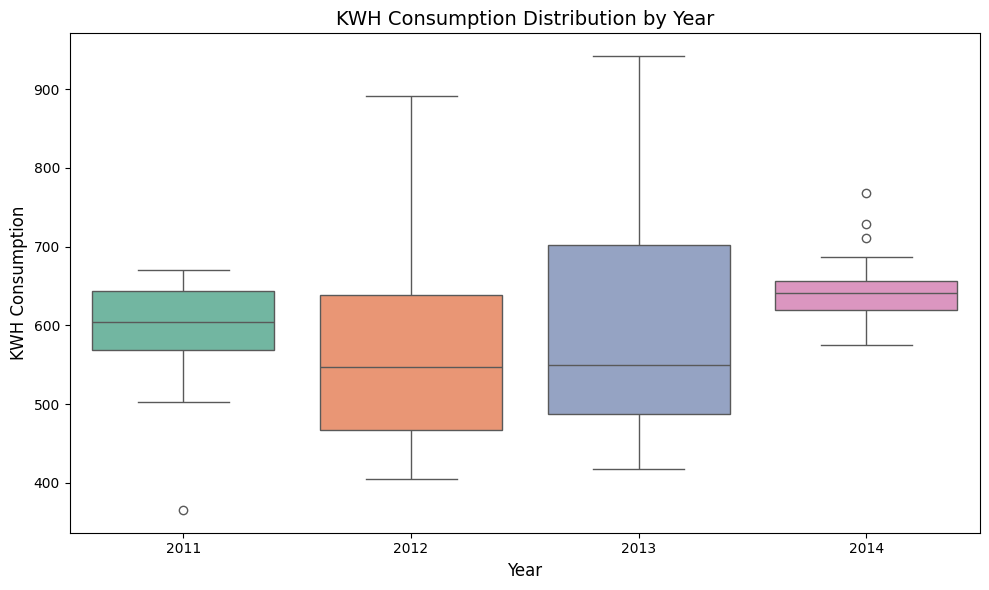

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='KWH', data=dx, palette='Set2')
plt.title("KWH Consumption Distribution by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("KWH Consumption", fontsize=12)
plt.tight_layout()
plt.show()

In [27]:
dx.head()

,Date,KWH,year,quarter,month,day
2,2011-12-08,365.577000,2011,4,December,8
3,2011-12-09,502.532000,2011,4,December,9
4,2011-12-10,637.385000,2011,4,December,10
5,2011-12-11,670.710001,2011,4,December,11
6,2011-12-12,614.313000,2011,4,December,12


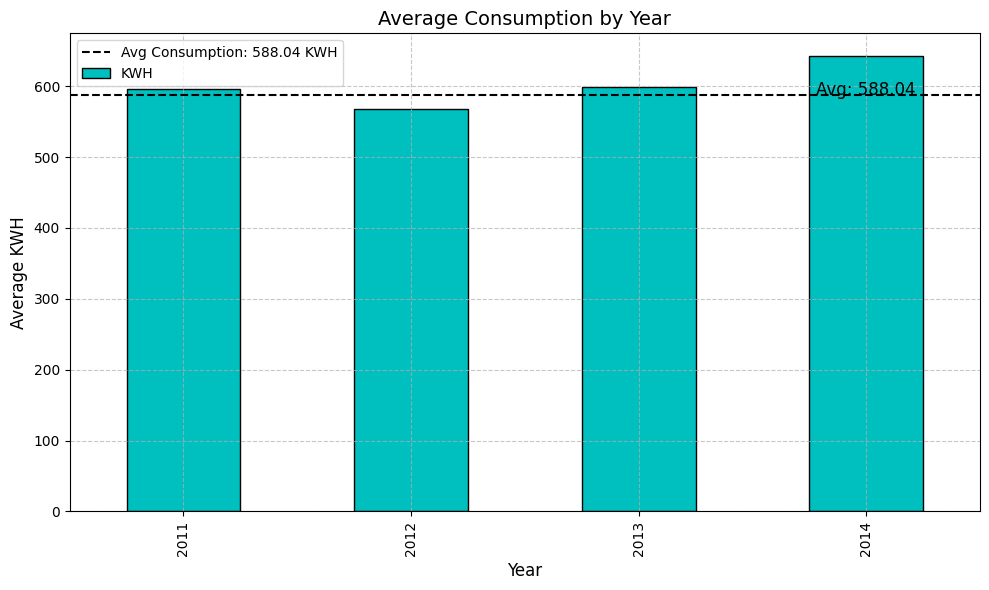

In [28]:
yearly_avg = dx.groupby('year')['KWH'].mean()
plt.figure(figsize=(10, 6))
yearly_avg.plot(kind='bar', color='c', edgecolor='black')
overall_avg = dx['KWH'].mean()
plt.axhline(y=overall_avg, color='black', linestyle='--', label=f"Avg Consumption: {overall_avg:.2f} KWH")
plt.text(len(yearly_avg) - 1, overall_avg + 0.05, f"Avg: {overall_avg:.2f}", color='black', fontsize=12, ha='center')
plt.title("Average Consumption by Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average KWH", fontsize=12)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

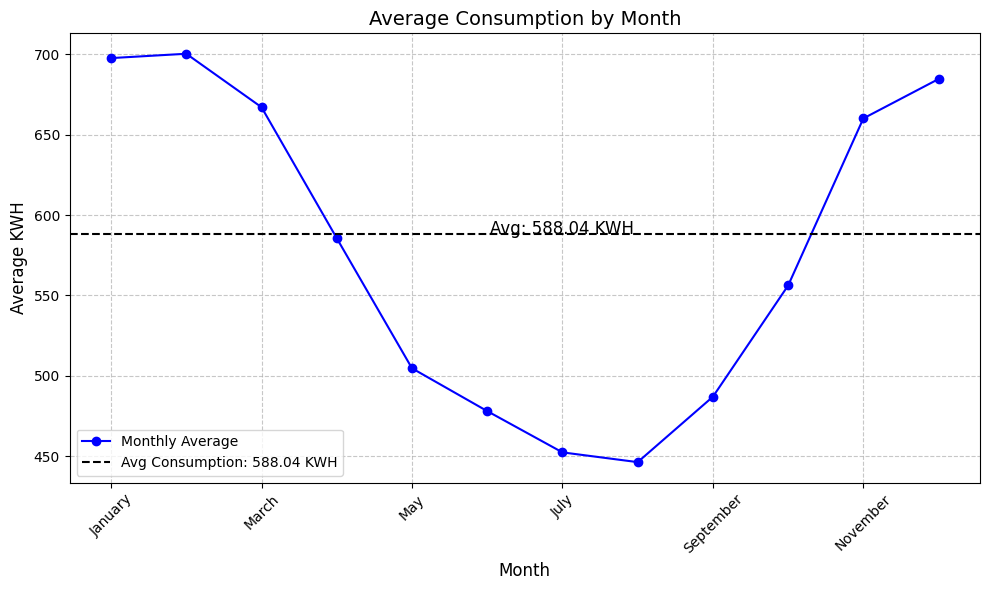

In [29]:
month_order = list(calendar.month_name)[1:]
dx['month'] = pd.Categorical(dx['month'], categories=month_order, ordered=True)

overall_avg = dx["KWH"].mean()
monthly_avg = dx.groupby('month')['KWH'].mean()
plt.figure(figsize=(10, 6))
monthly_avg.plot(kind='line', marker='o', color='b', label='Monthly Average')
plt.axhline(y=overall_avg, color='black', linestyle='--', label=f"Avg Consumption: {overall_avg:.2f} KWH")
plt.title("Average Consumption by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average KWH", fontsize=12)
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.text(6, overall_avg + 0.05, f"Avg: {overall_avg:.2f} KWH", color='black', fontsize=12, ha='center')
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
print('Minimum date:', dx.Date.min())
print('Maximum date:', dx.Date.max())

Minimum date: 2011-12-08 00:00:00
Maximum date: 2014-02-27 00:00:00


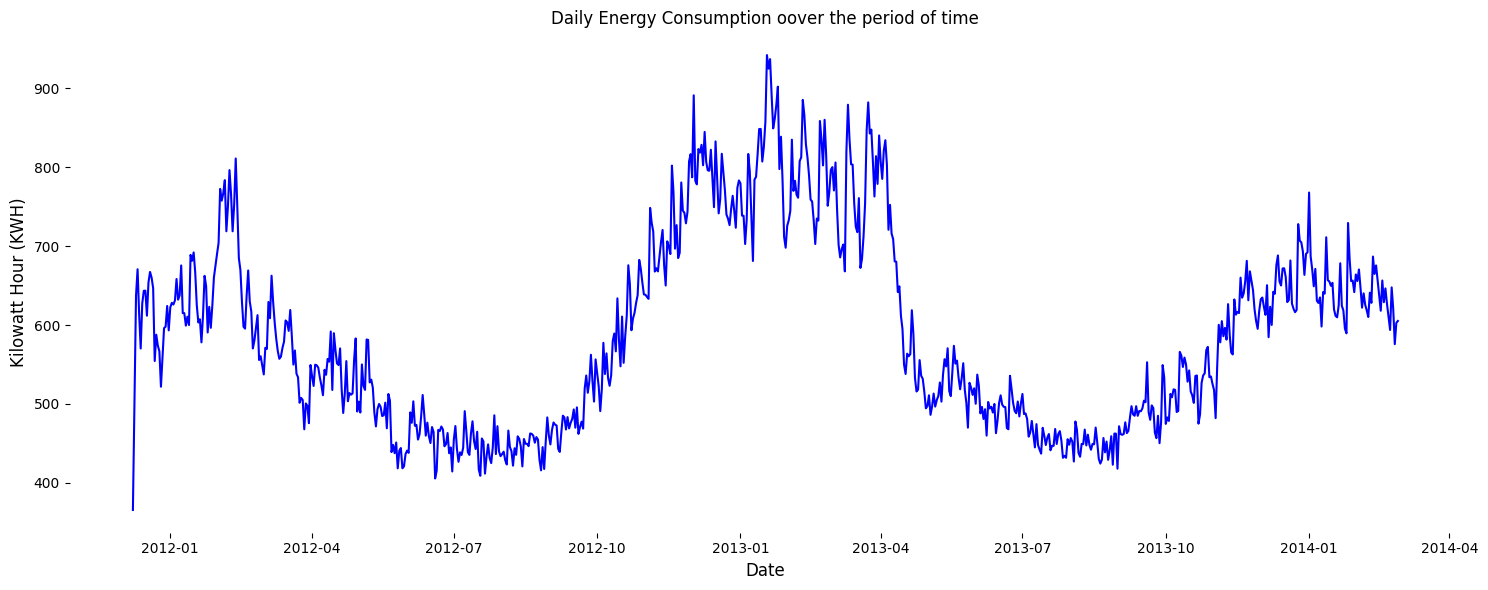

In [31]:
plt.figure(figsize=(15, 6))
plt.plot(dx['Date'], dx['KWH'], color='blue')
plt.ylabel('Kilowatt Hour (KWH)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Daily Energy Consumption oover the period of time')
plt.tight_layout()
sns.despine(bottom=True, left=True)
plt.show()

In [32]:
dx.head()

,Date,KWH,year,quarter,month,day
2,2011-12-08,365.577000,2011,4,December,8
3,2011-12-09,502.532000,2011,4,December,9
4,2011-12-10,637.385000,2011,4,December,10
5,2011-12-11,670.710001,2011,4,December,11
6,2011-12-12,614.313000,2011,4,December,12


In [33]:
dx['Date'] = pd.to_datetime(dx['Date'])
dx = dx.sort_values('Date')

In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
scaler = MinMaxScaler()
dx['KWH_normalized'] = scaler.fit_transform(dx[['KWH']])

In [36]:
dx.head()

,Date,KWH,year,quarter,month,day,KWH_normalized
2,2011-12-08,365.577000,2011,4,December,8,0.000000
3,2011-12-09,502.532000,2011,4,December,9,0.237512
4,2011-12-10,637.385000,2011,4,December,10,0.471379
5,2011-12-11,670.710001,2011,4,December,11,0.529172
6,2011-12-12,614.313000,2011,4,December,12,0.431367


In [37]:
def create_sequences(data, input_steps, output_steps):
    x, y = [], []
    for i in range(len(data) - input_steps - output_steps + 1):
        x.append(data[i:i + input_steps])
        y.append(data[i + input_steps:i + input_steps + output_steps])
    return np.array(x), np.array(y)

In [38]:
input_steps = 60
output_steps = 60
x, y = create_sequences(dx['KWH_normalized'].values, input_steps, output_steps)

In [39]:
split_idx = int(0.8 * len(x))
x_train, x_test = x[:split_idx], x[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [40]:
x_train

array([[0.        , 0.2375122 , 0.47137905, ..., 0.67992432, 0.69604057,
        0.72506993],
       [0.2375122 , 0.47137905, 0.52917244, ..., 0.69604057, 0.72506993,
        0.61263599],
       [0.47137905, 0.52917244, 0.43136677, ..., 0.72506993, 0.61263599,
        0.66724012],
       ...,
       [0.21414338, 0.23297024, 0.16880006, ..., 0.14518672, 0.144715  ,
        0.17671858],
       [0.23297024, 0.16880006, 0.19665362, ..., 0.144715  , 0.17671858,
        0.14193503],
       [0.16880006, 0.19665362, 0.23499583, ..., 0.17671858, 0.14193503,
        0.16549461]])

In [41]:
y_train

array([[0.61263599, 0.66724012, 0.74714501, ..., 0.3193473 , 0.31801021,
        0.31289595],
       [0.66724012, 0.74714501, 0.69429072, ..., 0.31801021, 0.31289595,
        0.2911521 ],
       [0.74714501, 0.69429072, 0.61263252, ..., 0.31289595, 0.2911521 ,
        0.27387392],
       ...,
       [0.14193503, 0.16549461, 0.14328946, ..., 0.26405814, 0.21539203,
        0.21755636],
       [0.16549461, 0.14328946, 0.13241407, ..., 0.21539203, 0.21755636,
        0.34753036],
       [0.14328946, 0.13241407, 0.14527516, ..., 0.21755636, 0.34753036,
        0.33945923]])

In [42]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [44]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(input_steps, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(output_steps)])

In [45]:
model.compile(optimizer='adam', loss='mse')

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 60)                  │           1,980 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 53,980 (210.86 KB)

 Trainable params: 53,980 (210.86 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - loss: 0.1618 - val_loss: 0.0743
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0884 - val_loss: 0.0424
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0477 - val_loss: 0.0175
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0330 - val_loss: 0.0150
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0295 - val_loss: 0.0141
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0248 - val_loss: 0.0107
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0262 - val_loss: 0.0215
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0324 - val_loss: 0.0107
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0228 - val_loss: 0.0102
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0209 - val_loss: 0.0194
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0236 - val_loss: 0.0067
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

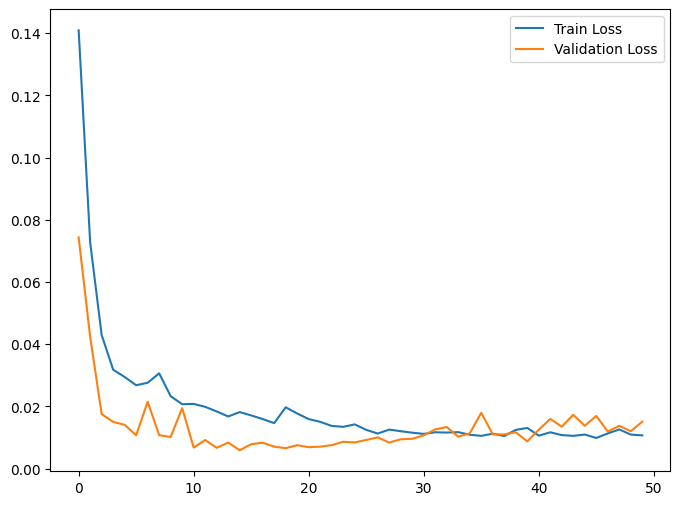

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [49]:
y_pred = model.predict(x_test)
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


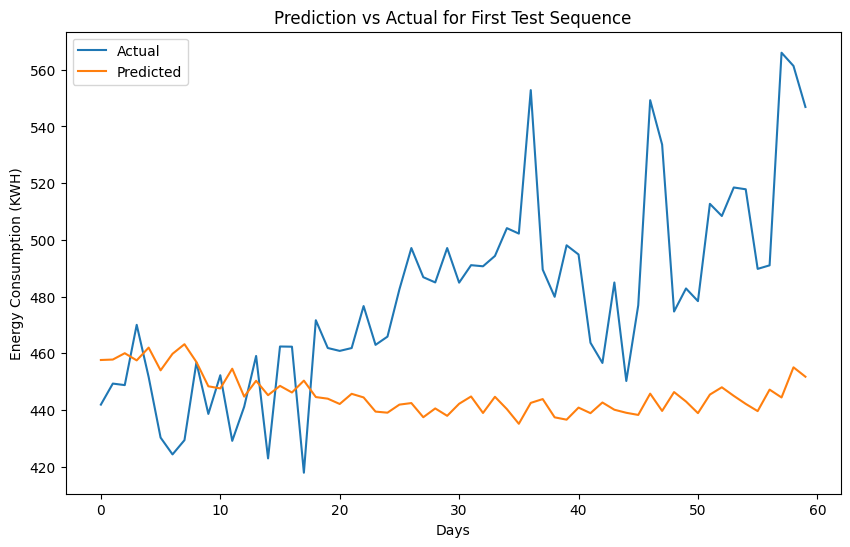

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(range(output_steps), y_test_rescaled[0], label='Actual')
plt.plot(range(output_steps), y_pred_rescaled[0], label='Predicted')
plt.title('Prediction vs Actual for First Test Sequence')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (KWH)')
plt.legend()
plt.show()

In [51]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(input_steps, 1)),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=True),
    Dropout(0.2),
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(output_steps)])

In [52]:
model.compile(optimizer='adam', loss='mse')

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 60, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 60, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 60, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 60)                  │           1,980 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73,692 (287.86 KB)

 Trainable params: 73,692 (287.86 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - loss: 0.1864 - val_loss: 0.0955
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1221 - val_loss: 0.0469
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0680 - val_loss: 0.0271
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0427 - val_loss: 0.0177
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0326 - val_loss: 0.0104
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0256 - val_loss: 0.0082
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0245 - val_loss: 0.0102
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0232 - val_loss: 0.0097
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0216 - val_loss: 0.0108
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0218 - val_loss: 0.0110
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0224 - val_loss: 0.0123
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0

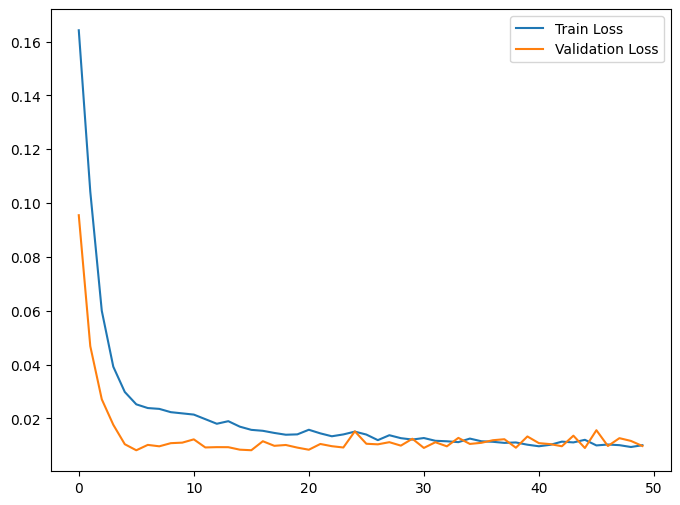

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [56]:
y_pred = model.predict(x_test)
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step


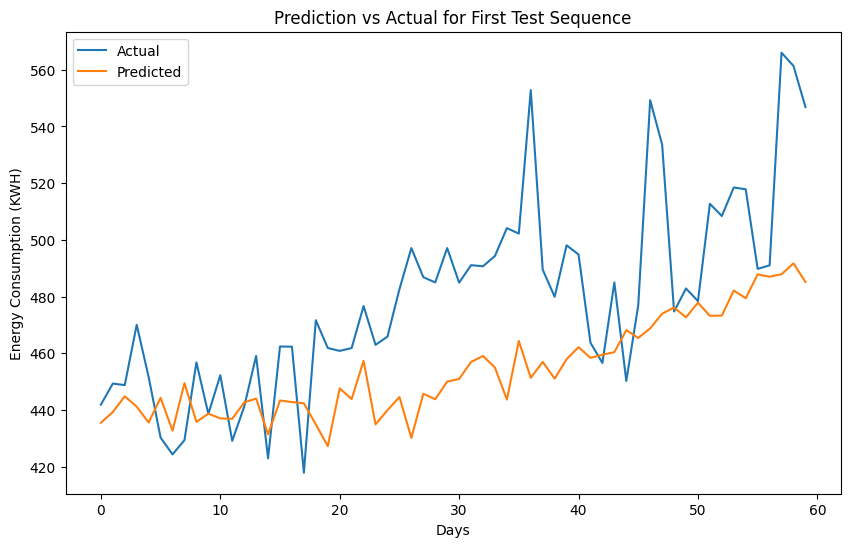

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(range(output_steps), y_test_rescaled[0], label='Actual')
plt.plot(range(output_steps), y_pred_rescaled[0], label='Predicted')
plt.title('Prediction vs Actual for First Test Sequence')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (KWH)')
plt.legend()
plt.show()

In [58]:
from tensorflow.keras.layers import GRU

In [59]:
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(input_steps, 1)),
    Dropout(0.2),
    GRU(64, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(output_steps)])

In [60]:
model.compile(optimizer='adam', loss='mse')

In [61]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 60, 64)              │          12,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 64)                  │          24,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 60)                  │           1,980 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41,884 (163.61 KB)

 Trainable params: 41,884 (163.61 KB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1715 - val_loss: 0.0920
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0951 - val_loss: 0.0333
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0439 - val_loss: 0.0224
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0348 - val_loss: 0.0125
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0280 - val_loss: 0.0177
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0286 - val_loss: 0.0220
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0278 - val_loss: 0.0144
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0270 - val_loss: 0.0160
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0245 - val_loss: 0.0145
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0270 - val_loss: 0.0176
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0252 - val_loss: 0.0162
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0255 - v

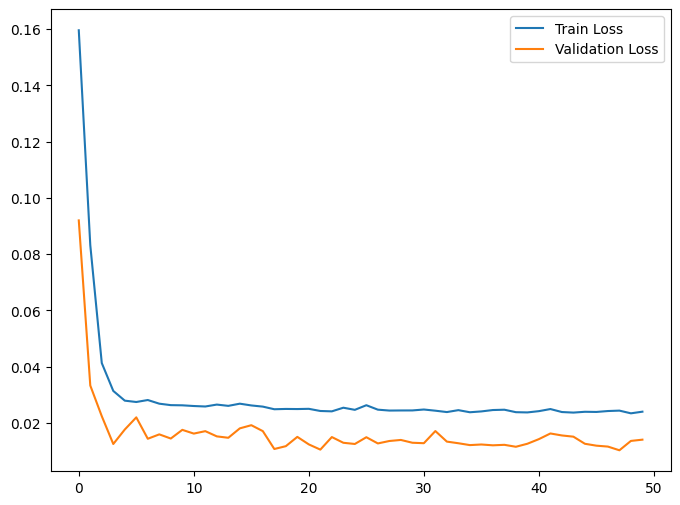

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [64]:
y_pred = model.predict(x_test)
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


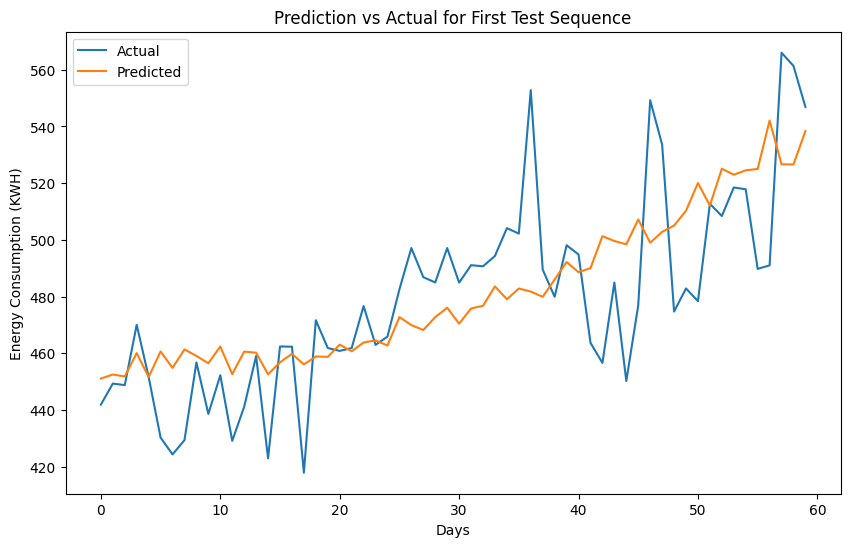

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(range(output_steps), y_test_rescaled[0], label='Actual')
plt.plot(range(output_steps), y_pred_rescaled[0], label='Predicted')
plt.title('Prediction vs Actual for First Test Sequence')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (KWH)')
plt.legend()
plt.show()

In [66]:
model = Sequential([
    GRU(64, return_sequences=True, input_shape=(input_steps, 1)),
    Dropout(0.2),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(32, return_sequences=True),
    Dropout(0.2),
    GRU(32, return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(output_steps)])

In [67]:
model.compile(optimizer='adam', loss='mse')

In [68]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.1720 - val_loss: 0.0925
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1066 - val_loss: 0.0604
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0617 - val_loss: 0.0246
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0413 - val_loss: 0.0170
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0329 - val_loss: 0.0225
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0324 - val_loss: 0.0149
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0296 - val_loss: 0.0159
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0282 - val_loss: 0.0168
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0297 - val_loss: 0.0165
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0269 - val_loss: 0.0100
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0275 - val_loss: 0.0122
Epoch 12/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0

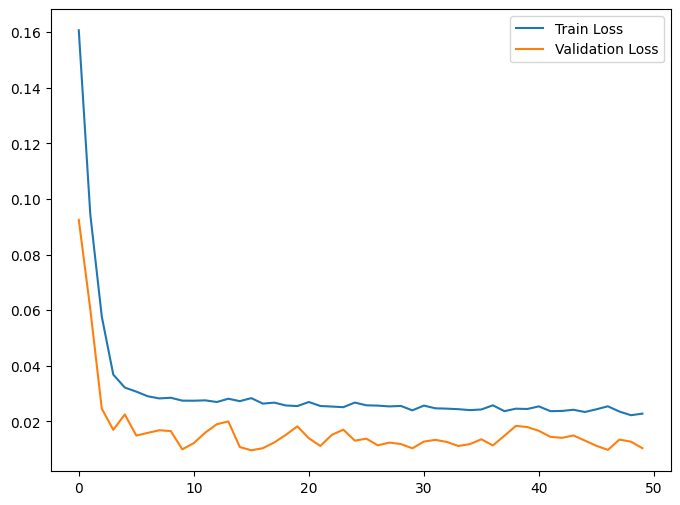

In [69]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [70]:
y_pred = model.predict(x_test)
y_test_rescaled = scaler.inverse_transform(y_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step


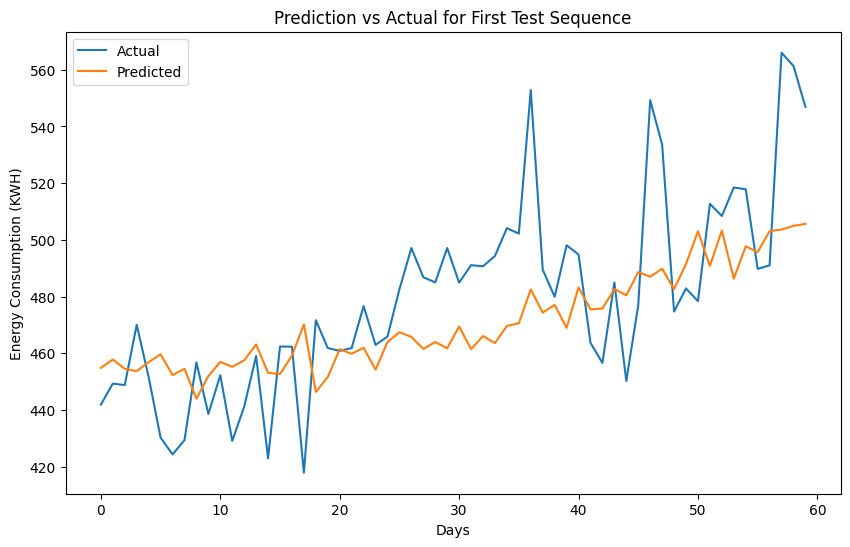

In [71]:
plt.figure(figsize=(10, 6))
plt.plot(range(output_steps), y_test_rescaled[0], label='Actual')
plt.plot(range(output_steps), y_pred_rescaled[0], label='Predicted')
plt.title('Prediction vs Actual for First Test Sequence')
plt.xlabel('Days')
plt.ylabel('Energy Consumption (KWH)')
plt.legend()
plt.show()